# Assessment Problems

## Problem 1: Data from yfinance

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

In [38]:
# Data frames.
import pandas as pd

# Dates and times.
import datetime as dt

# Plotting
import matplotlib.pyplot as plt

# Listing files in a folder.
import os

# Yahoo Finance data.
import yfinance as yf

tickers = ["META","AAPL","AMZN","NFLX","GOOG"]
# Function get_data
def get_data():

    # Get data.
    df = yf.download(tickers,period="5d",interval="1h",auto_adjust=False)

    # Create data folder if it doesn't already exist
    os.makedirs("data", exist_ok=True)

    # Format date and time.
    now = dt.datetime.now()

    # create file name with format YYYYMMDD-HHmmss
    filename = now.strftime("%Y%m%d-%H%M%S")

    # Save data as csv in folder data
    df.to_csv(f"data/{filename}.csv")

    return

# Run the function and capture the data frame
get_data()

[*********************100%***********************]  5 of 5 completed


references:
https://www.geeksforgeeks.org/python/python-os-makedirs-method/


## Problem 2: Plotting Data

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

<Figure size 1500x700 with 0 Axes>

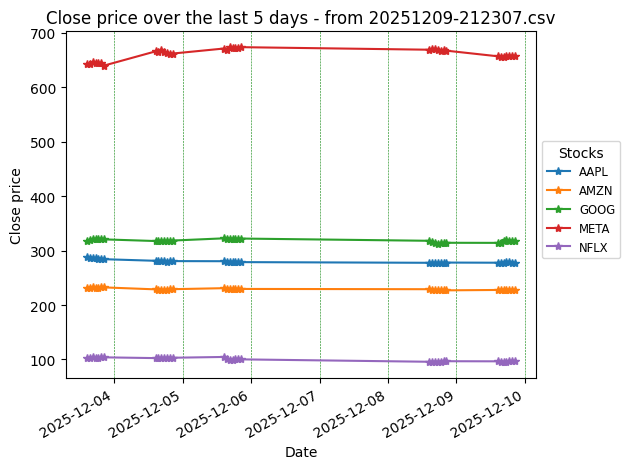

In [ ]:
# Function get_data
def plot_data():

    # List the files in the data folder.
    data_files = os.listdir('data')

    # Sort the list of files.
    data_files=sorted(data_files, reverse=True)

    # The latest file.
    latest_file = data_files[0]

    # Read the CSV file.
    df = pd.read_csv(f'data/{latest_file}', header=[0, 1], index_col=0, parse_dates=True)
    df.head()

    # Create 'plots' folder if it doesn't already exist
    os.makedirs("plots", exist_ok=True)

    # Plot the Close price.
    plt.figure(figsize=(15,7))
    
    df['Close'].plot(marker='*')
    plt.title("Close price over the last 5 days - from " + latest_file)
    plt.xlabel('Date')
    plt.ylabel('Close price')
    plt.grid(axis = 'x', color = 'green', linestyle = '--', linewidth = 0.4)
    plt.legend(title="Stocks",fontsize='small',bbox_to_anchor=(1,0.7))
    plt.tight_layout()

    # Name of the plot
    plot_name = latest_file[:-4]
    # put a copy of the image of the plot (.png file) into the `plots` folder in the root of my repository
    plt.savefig(f"plots/{plot_name}.png")

    plt.show()

    return

# Run the function and capture the plot
plot_data()

References: https://matplotlib.org/stable/users/explain/axes/tight_layout_guide.html

## Problem 3: Script

Create a Python script called `faang.py` in the root of your repository.
Copy the above functions into it and make it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot.
Note that this will require a shebang line and the script to be marked executable.
Explain the steps you took in your notebook.

## Problem 4: Automation

Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.
The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.
In your notebook, explain each of the individual lines in your workflow.